<a href="https://colab.research.google.com/github/YairFrank/transfermarkt/blob/main/tm_mv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
#left = []
#joined = []
countries = list(range(1,300))
# south_america = {9: 'Argentina', 23: 'Bolivia', 26: 'Brazil', 33: 'Chile', 44: 'Ecuador',
#                  83: 'Colombia', 132: 'Paraguay', 133: 'Peru', 179: 'Uruguay', 182: 'Venezuela'}
#positions = ['Torwart', 'Abwehr', 'Mittelfeld', 'Sturm']
main_positions = ['Goalkeeper',
                  'Sweeper', 'Centre-Back', 'Left-Back', 'Right-Back',
                  'Defensive Midfield', 'Central Midfield', 'Right Midfield', 'Left Midfield', 'Attacking Midfield',
                  'Left Winger', 'Right Winger', 'Second Striker', 'Centre-Forward']

main_positions_dic = dict(enumerate(main_positions, 1))
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
#n = [20, 11]

In [3]:
d_c = {'1': 'Afghanistan',
 '3': 'Albania',
 '4': 'Algeria',
 '239': 'American Samoa',
 '234': 'American Virgin Islands',
 '5': 'Andorra',
 '6': 'Angola',
 '232': 'Anguilla',
 '7': 'Antigua and Barbuda',
 '9': 'Argentina',
 '10': 'Armenia',
 '233': 'Aruba',
 '12': 'Australia',
 '127': 'Austria',
 '13': 'Azerbaijan',
 '14': 'Bahamas',
 '15': 'Bahrain',
 '16': 'Bangladesh',
 '17': 'Barbados',
 '18': 'Belarus',
 '19': 'Belgium',
 '20': 'Belize',
 '21': 'Benin',
 '211': 'Bermuda',
 '22': 'Bhutan',
 '23': 'Bolivia',
 '269': 'Bonaire',
 '24': 'Bosnia-Herzegovina',
 '25': 'Botsuana',
 '26': 'Brazil',
 '276': 'British India',
 '231': 'British Virgin Islands',
 '27': 'Brunei Darussalam',
 '28': 'Bulgaria',
 '29': 'Burkina Faso',
 '30': 'Burundi',
 '79': 'Cambodia',
 '31': 'Cameroon',
 '80': 'Canada',
 '32': 'Cape Verde',
 '229': 'Cayman Islands',
 '138': 'Central African Republic',
 '171': 'Chad',
 '33': 'Chile',
 '34': 'China',
 '164': 'Chinese Taipei',
 '248': 'Christmas Island',
 '83': 'Colombia',
 '35': 'Comoros',
 '85': 'Congo',
 '238': 'Cookinseln',
 '36': 'Costa Rica',
 '38': "Cote d'Ivoire",
 '278': 'Crimea',
 '37': 'Croatia',
 '220': 'CSSR',
 '88': 'Cuba',
 '260': 'Curacao',
 '188': 'Cyprus',
 '172': 'Czech Republic',
 '39': 'Denmark',
 '41': 'Djibouti',
 '42': 'Dominica',
 '43': 'Dominican Republic',
 '193': 'DR Congo',
 '222': 'East Germany (GDR)',
 '44': 'Ecuador',
 '2': 'Egypt',
 '45': 'El Salvador',
 '189': 'England',
 '8': 'Equatorial Guinea',
 '46': 'Eritrea',
 '47': 'Estonia',
 '162': 'Eswatini',
 '11': 'Ethiopia',
 '250': 'Falkland Islands',
 '208': 'Faroe Islands',
 '111': 'Federated States of Micronesia',
 '48': 'Fiji',
 '49': 'Finland',
 '50': 'France',
 '252': 'French Guiana',
 '51': 'Gabon',
 '53': 'Georgia',
 '40': 'Germany',
 '54': 'Ghana',
 '266': 'Gibraltar',
 '56': 'Greece',
 '243': 'Greenland',
 '55': 'Grenada',
 '251': 'Guadeloupe',
 '241': 'Guam',
 '58': 'Guatemala',
 '271': 'Guernsey',
 '59': 'Guinea',
 '60': 'Guinea-Bissau',
 '61': 'Guyana',
 '62': 'Haiti',
 '66': 'Honduras',
 '218': 'Hongkong',
 '178': 'Hungary',
 '73': 'Iceland',
 '67': 'India',
 '68': 'Indonesia',
 '71': 'Iran',
 '70': 'Iraq',
 '72': 'Ireland',
 '270': 'Isle of Man',
 '74': 'Israel',
 '75': 'Italy',
 '76': 'Jamaica',
 '77': 'Japan',
 '272': 'Jersey',
 '78': 'Jordan',
 '223': 'Jugoslawien (SFR)',
 '81': 'Kazakhstan',
 '82': 'Kenya',
 '246': 'Kiribati',
 '86': 'Korea, North',
 '87': 'Korea, South',
 '244': 'Kosovo',
 '89': 'Kuwait',
 '90': 'Kyrgyzstan',
 '91': 'Laos',
 '92': 'Latvia',
 '94': 'Lebanon',
 '93': 'Lesotho',
 '95': 'Liberia',
 '96': 'Libya',
 '97': 'Liechtenstein',
 '98': 'Lithuania',
 '99': 'Luxembourg',
 '219': 'Macao',
 '274': 'Macedonia',
 '101': 'Madagascar',
 '102': 'Malawi',
 '103': 'Malaysia',
 '104': 'Maldives',
 '105': 'Mali',
 '106': 'Malta',
 '257': 'Marshall Islands',
 '207': 'Martinique',
 '108': 'Mauritania',
 '109': 'Mauritius',
 '277': 'Mayotte',
 '110': 'Mexico',
 '112': 'Moldova',
 '113': 'Monaco',
 '114': 'Mongolia',
 '216': 'Montenegro',
 '235': 'Montserrat',
 '107': 'Morocco',
 '115': 'Mozambique',
 '116': 'Myanmar',
 '117': 'Namibia',
 '118': 'Nauru',
 '119': 'Nepal',
 '122': 'Netherlands',
 '227': 'Netherlands Antilles',
 '255': 'Netherlands East India',
 '236': 'Neukaledonien',
 '120': 'New Zealand',
 '121': 'Nicaragua',
 '123': 'Niger',
 '124': 'Nigeria',
 '261': 'Niue',
 '100': 'North Macedonia',
 '192': 'Northern Ireland',
 '268': 'Northern Mariana Islands',
 '125': 'Norway',
 '126': 'Oman',
 '128': 'Pakistan',
 '129': 'Palau',
 '240': 'Palestine',
 '130': 'Panama',
 '131': 'Papua New Guinea',
 '132': 'Paraguay',
 '259': "People's republic of the Congo",
 '133': 'Peru',
 '134': 'Philippines',
 '135': 'Poland',
 '136': 'Portugal',
 '228': 'Puerto Rico',
 '137': 'Qatar',
 '249': 'Réunion',
 '140': 'Romania',
 '141': 'Russia',
 '139': 'Rwanda',
 '263': 'Saarland',
 '267': 'Saint-Martin',
 '143': 'Samoa',
 '144': 'San Marino',
 '145': 'Sao Tome and Principe',
 '146': 'Saudi Arabia',
 '190': 'Scotland',
 '149': 'Senegal',
 '215': 'Serbia',
 '150': 'Serbia and Montenegro',
 '151': 'Seychelles',
 '152': 'Sierra Leone',
 '153': 'Singapore',
 '265': 'Sint Maarten',
 '154': 'Slovakia',
 '155': 'Slovenia',
 '69': 'Solomon Islands',
 '156': 'Somalia',
 '159': 'South Africa',
 '262': 'Southern Sudan',
 '157': 'Spain',
 '158': 'Sri Lanka',
 '225': 'St. Kitts & Nevis',
 '230': 'St. Lucia',
 '224': 'St. Vincent & Grenadinen',
 '160': 'Sudan',
 '161': 'Suriname',
 '273': 'Swaziland',
 '147': 'Sweden',
 '148': 'Switzerland',
 '163': 'Syria',
 '237': 'Tahiti',
 '165': 'Tajikistan',
 '166': 'Tanzania',
 '167': 'Thailand',
 '52': 'The Gambia',
 '245': 'Tibet',
 '242': 'Timor-Leste',
 '168': 'Togo',
 '169': 'Tonga',
 '170': 'Trinidad and Tobago',
 '173': 'Tunisia',
 '174': 'Turkey',
 '175': 'Turkmenistan',
 '226': 'Turks- and Caicosinseln',
 '247': 'Tuvalu',
 '221': 'UdSSR',
 '176': 'Uganda',
 '177': 'Ukraine',
 '183': 'United Arab Emirates',
 '264': 'United Kingdom',
 '184': 'United States',
 '179': 'Uruguay',
 '180': 'Uzbekistan',
 '181': 'Vanuatu',
 '256': 'Vatican',
 '182': 'Venezuela',
 '185': 'Vietnam',
 '191': 'Wales',
 '275': 'Western Sahara',
 '186': 'Yemen',
 '258': 'Yugoslavia (Republic)',
 '254': 'Zaire',
 '142': 'Zambia',
 '253': 'Zanzibar',
 '187': 'Zimbabwe'}

In [4]:
lst = [[[],[],[],[],[]], [[],[],[],[],[]]]
s = ['s','w']
for season_list, season in zip(lst, s):
    for country in d_c:
        print('country: ' + country)
        for position in main_positions_dic:
            print('position: ' + str(position))
            page = ('https://www.transfermarkt.com/transfers/wertvollstetransfers/statistik/top/ajax/yw1/land_id/'
                      +country+'/ausrichtung//spielerposition_id/'
                      +str(position)+'/w_s/'
                      +season+'/art/nf/plus/1/galerie/0/page/')
            a=1
            prev = []
            while(True):
                print(a)

                pageTree = requests.get(page+str(a), headers=headers)
                pageSoup = BeautifulSoup(pageTree.content, 'html.parser')

                Players = pageSoup.find_all("img", {"class": "bilderrahmen-fixed lazy lazy"})
                #Countries = pageSoup.find_all("img", {"class": "flaggenrahmen"})
                Seasons = pageSoup.find_all("td", {"class": "zentriert"})
                Fees = pageSoup.find_all("td", {"class": "rechts"})

                check = []
                for i in range(0, len(Players)):
                    check.append(str(Players[i]).split('" class')[0].split('<img alt="')[1])
                #print(prev)
                #print(check)
                if prev==check:
                    break

                for i in range(0, len(Players)):
                    season_list[0].append(str(Players[i]).split('" class')[0].split('<img alt="')[1])
#                 for i in range(0, len(Countries)):
#                     season_list[2].append(str(Countries[i]).split('" class')[0].split('<img alt="')[1])
                for i in range(1, len(Seasons), 3):
                    season_list[3].append(Seasons[i].text)
                for i in range(0, len(Fees), 3):
                    season_list[4].append(Fees[i].text)

                season_list[1] += [main_positions_dic[position] for i in range(len(Players))]
                season_list[2] += [d_c[country] for i in range(len(Players))]
                prev = check
                a+=1

Streaming output truncated to the last 5000 lines.
1
2
position: 11
1
2
position: 12
1
2
position: 13
1
2
position: 14
1
2
country: 70
position: 1
1
2
position: 2
1
position: 3
1
position: 4
1
2
position: 5
1
position: 6
1
2
position: 7
1
2
position: 8
1
position: 9
1
position: 10
1
2
position: 11
1
2
position: 12
1
position: 13
1
position: 14
1
country: 72
position: 1
1
2
position: 2
1
position: 3
1
2
position: 4
1
2
position: 5
1
2
position: 6
1
2
position: 7
1
2
position: 8
1
2
position: 9
1
2
position: 10
1
2
position: 11
1
2
position: 12
1
2
position: 13
1
position: 14
1
2
3
country: 270
position: 1
1
position: 2
1
position: 3
1
position: 4
1
position: 5
1
position: 6
1
position: 7
1
position: 8
1
position: 9
1
position: 10
1
position: 11
1
position: 12
1
position: 13
1
position: 14
1
country: 74
position: 1
1
2
position: 2
1
position: 3
1
2
position: 4
1
2
position: 5
1
2
position: 6
1
2
position: 7
1
2
position: 8
1
2
position: 9
1
2
position: 10
1
2
position: 11
1
2
position: 1

In [5]:
raw = pd.DataFrame({"Player": lst[0][0]+lst[1][0],
                   "Position": lst[0][1]+lst[1][1],
                   "Country": lst[0][2]+lst[1][2],
                   "Season": lst[0][3]+lst[1][3],
                   "Market Value":lst[0][4]+lst[1][4]})

raw.to_csv('raw_data.csv')

In [6]:
#check = [[],[]]
for season in lst:
    cleaned_mv = []
    for a in season[4]:
        if 'Loan' in a:
            cleaned_mv.append(None)
        elif 'm' in a:
            cleaned_mv.append(int(float(a.split('m')[0].split('€')[1])*1000000))
        elif 'k' in a:
            cleaned_mv.append(int(float(a.split('k')[0].split('€')[1])*1000))
        elif '€' in a:
            cleaned_mv.append(int(a.split('€')[1]))
        elif '0' in a:
            cleaned_mv.append(None)
        else:
            print(a)
            print('Error')
    season[4] = cleaned_mv
    #b = cleaned_mv

In [7]:
raw_edit = pd.DataFrame({"Player": lst[0][0]+lst[1][0],
                   "Position": lst[0][1]+lst[1][1],
                   "Country": lst[0][2]+lst[1][2],
                   "Season": lst[0][3]+lst[1][3],
                   "Market Value":lst[0][4]+lst[1][4]})

raw_edit.to_csv('raw_data_edit.csv')

In [8]:
inflation = {2000:1.58, 2001:1.54, 2002:1.51, 2003:1.48, 2004:1.45, 2005:1.41, 2006:1.38, 2007:1.36, 2008:1.31, 2009:1.31,
            2010:1.29, 2011:1.25, 2012:1.22, 2013:1.21, 2014:1.2, 2015:1.2, 2016:1.2, 2017:1.18, 2018:1.15, 2019:1.14,
            2020:1.13, 2021:1.1, 2022:1, 2023:1, 2024:1}

In [9]:
updated_mv = []
for s, mv in zip(lst[0][3], lst[0][4]):
    if not mv==None:
        updated_mv.append(int(inflation[int(s[:2])+2000]*mv))
    else:
        updated_mv.append(None)
lst[0][4] = updated_mv

updated_mv = []
for s, mv in zip(lst[1][3], lst[1][4]):
    if not mv==None:
        updated_mv.append(int((inflation[int(s[:2])+2000]*mv + inflation[int(s[3:])+2000]*mv)/2))
    else:
        updated_mv.append(None)
lst[1][4] = updated_mv

In [10]:
df = pd.DataFrame({"Player": lst[0][0]+lst[1][0],
                   "Position": lst[0][1]+lst[1][1],
                   "Country": lst[0][2]+lst[1][2],
                   "Season": lst[0][3]+lst[1][3],
                   "Market Value":lst[0][4]+lst[1][4]})

In [11]:
df = df.dropna(subset=['Market Value'])

In [12]:
df.to_csv('mv_world.csv')

In [13]:
df.groupby('Season')['Market Value'].mean()

Season
01/02    7.186667e+05
02/03    2.793500e+06
03/04    5.794938e+06
04/05    2.286371e+06
05/06    2.805673e+06
06/07    2.645763e+06
07/08    3.043532e+06
08/09    2.600430e+06
09/10    2.891241e+06
10/11    2.463977e+06
11/12    2.578489e+06
12/13    2.681629e+06
13/14    3.362727e+06
14/15    3.270624e+06
15/16    3.635406e+06
16/17    4.064453e+06
17/18    4.186517e+06
18/19    4.009646e+06
19/20    4.577277e+06
20/21    3.431727e+06
21/22    3.079939e+06
22/23    3.534212e+06
23/24    4.357558e+06
24/25    2.375000e+07
Name: Market Value, dtype: float64

In [14]:
df.groupby('Season')['Market Value'].count()

Season
01/02       3
02/03       8
03/04       4
04/05     195
05/06     794
06/07    1047
07/08    1426
08/09    1633
09/10    1356
10/11    1534
11/12    1583
12/13    1476
13/14    1456
14/15    1472
15/16    1733
16/17    1840
17/18    2074
18/19    2178
19/20    2195
20/21    1738
21/22    1992
22/23    2229
23/24     425
24/25       2
Name: Market Value, dtype: int64

<Axes: xlabel='Season', ylabel='Market Value'>

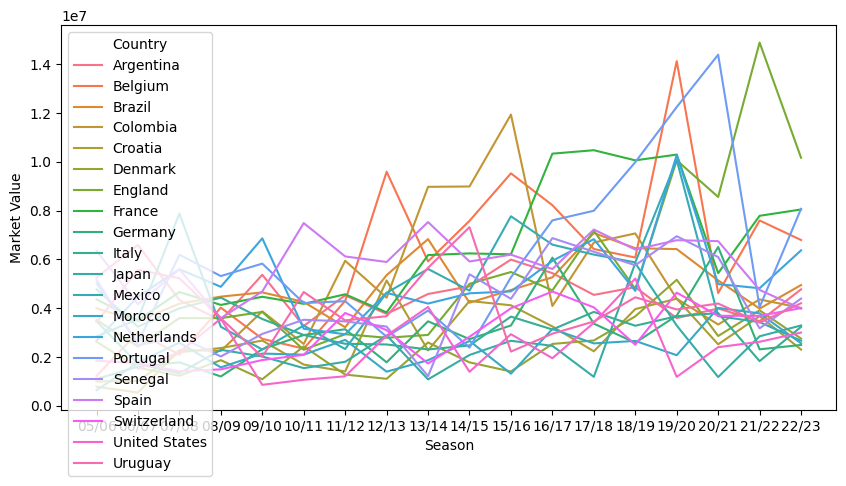

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
top_20 = ['England', 'Spain', 'Italy', 'Germany', 'Netherlands', 'France', 'Portugal', 'Belgium', 'Argentina', 'Brazil',
         'Croatia', 'Morocco', 'Switzerland', 'United States', 'Mexico', 'Uruguay', 'Colombia', 'Senegal', 'Denmark', 'Japan']
df_top = df[df['Country'].isin(top_20)]
df_top = df_top[~df_top['Season'].isin(['01/02', '02/03', '03/04', '04/05', '23/24', '24/25'])]
g_top = df_top.groupby(['Country','Season'])['Market Value'].mean().reset_index()
sns.lineplot(data = g_top, x='Season', y='Market Value', hue='Country')

<Axes: xlabel='Season', ylabel='Market Value'>

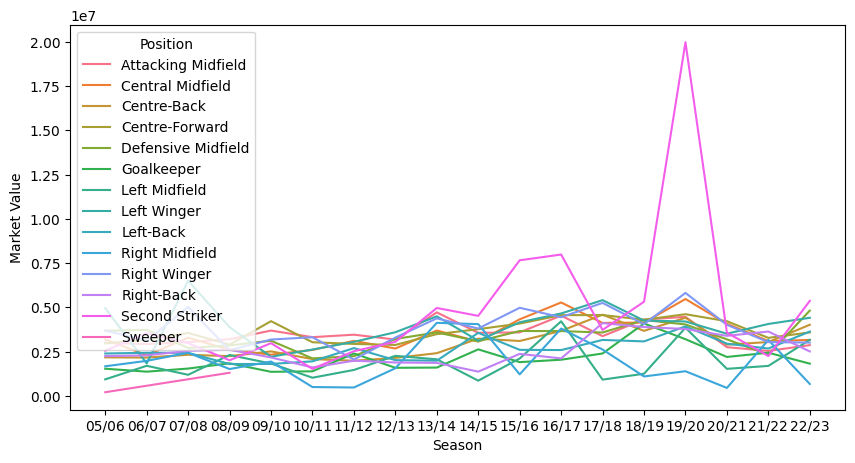

In [24]:
# middle_east = ['United Arab Emirates', 'Bahrain', 'Palestine', 'Jordan', 'Kuwait', 'Lebanon', 'Syria', 'Oman', 'Iraq',
#                'Saudi Arabia', 'Qatar', 'Yemen']
plt.figure(figsize=(10,5))
#df_me = df[df['Country'].isin(middle_east)]
df_p = df[~df['Season'].isin(['01/02', '02/03', '03/04', '04/05', '23/24', '24/25'])]
g_p = df_p.groupby(['Position','Season'])['Market Value'].mean().reset_index()
sns.lineplot(data = g_p, x='Season', y='Market Value', hue='Position')